In [ ]:
# adapted from the great example code: https://towardsdatascience.com/getting-started-with-pytorch-image-models-timm-a-practitioners-guide-4e77b4bf9055

import timm
import torch
import torchvision
import numpy as np
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from torch.utils.data import DataLoader
from timm.data import ImageDataset
from timm.data.mixup import Mixup
from timm.data.transforms_factory import create_transform 
from timm.data.auto_augment import rand_augment_transform
from timm.data.transforms import RandomResizedCropAndInterpolation

def create_dataloader_iterator():
    dataset = ImageDataset("mured_single", transform=create_transform(224))
    dl = iter(DataLoader(dataset, batch_size=32))
    return dl

def imshow_original(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    fig = figure(figsize=(10, 5))
    plt.axis("off")
    plt.imshow(inp)
    if title is not None:
        plt.title(title, fontsize=18, fontweight="bold")
    plt.savefig("augment_imgs/cutmix_on_20_classes.png", bbox_inches="tight")
    plt.pause(0.001)  # pause a bit so that plots are updated
    


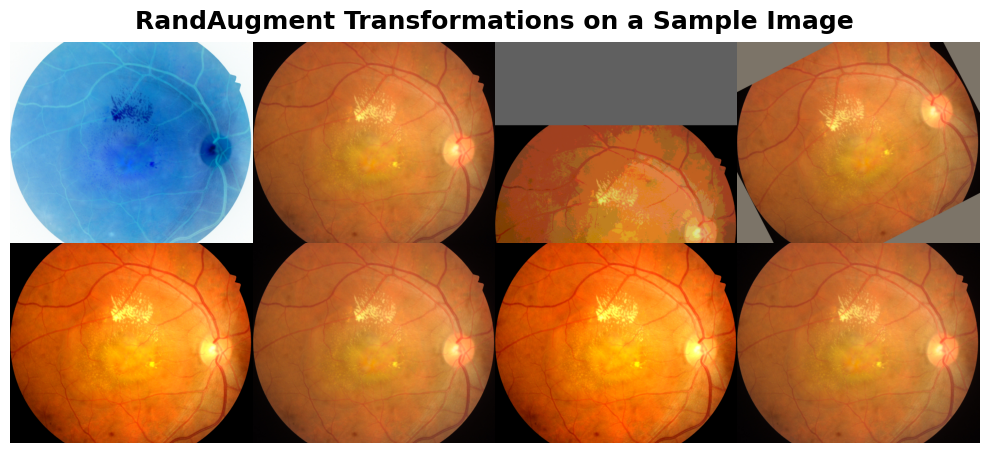

In [32]:
# rand augment
create_transform(224, is_training=True, auto_augment="rand-m9-mstd0.5")

ret_path = Path("mured_single/val/ARMD")
ret_image_paths = list(ret_path.iterdir())

image = Image.open(ret_image_paths[1])

tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5', 
    hparams={'img_mean': (124, 116, 104)}
)

fig, ax = plt.subplots(2, 4, figsize=(10, 4.31))

for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[0, idx].imshow(im)
    ax[0, idx].axis("off")
    ax[0, idx].set_aspect("equal")
    
for idx, im in enumerate([tfm(image) for i in range(4)]):
    ax[1, idx].imshow(im)
    ax[1, idx].axis("off")
    ax[1, idx].set_aspect("equal")

fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
fig.suptitle("RandAugment Transformations on a Sample Image", fontsize=18, fontweight="bold", y=1.04)
plt.savefig("augment_imgs/randaugment_transformations_on_a_sample_image_2.png", bbox_inches="tight")
plt.show()


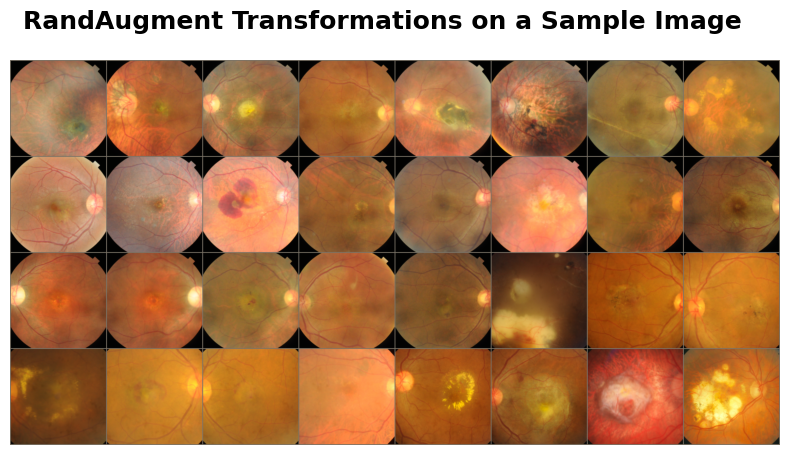

In [14]:
# mixup and cutmix
dataloader = create_dataloader_iterator()

inputs, classes = next(dataloader)

out = torchvision.utils.make_grid(inputs)
fig = figure(figsize=(10, 5))
fig.tight_layout()
fig.suptitle("RandAugment Transformations on a Sample Image", fontsize=18, fontweight="bold")
plt.axis("off")
imshow(out)
plt.show()


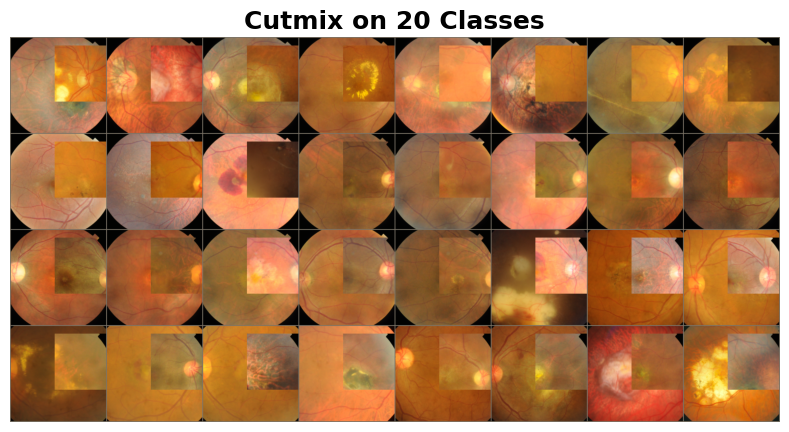

In [80]:
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 1.,
    'prob': 1,
    'switch_prob': 0.5,
    'mode': 'batch',
    'label_smoothing': 0.1,
    'num_classes': 20}

mixup_fn = Mixup(**mixup_args)

mixed_inputs, mixed_classes = mixup_fn(inputs.to(torch.device('cuda:0')), classes.to(torch.device('cuda:0')))
out = torchvision.utils.make_grid(mixed_inputs)


imshow(out, title="Cutmix on 20 Classes")
# plt.savefig("augment_imgs/cutmix_on_20_classes.png", bbox_inches="tight")
# plt.show()
